<a href="https://colab.research.google.com/github/joelAno225/GoMyCode/blob/main/cheickpoint3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import io

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving titanic-passengers.csv to titanic-passengers.csv


In [3]:
df = pd.read_csv(io.BytesIO(data_to_load['titanic-passengers.csv']),sep=';')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [7]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().sum().sum()

866

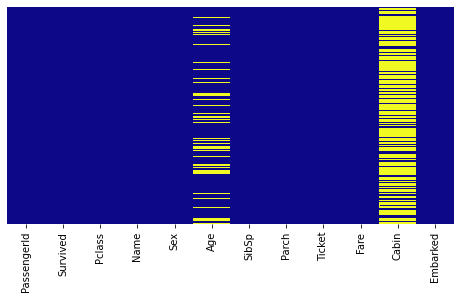

In [10]:
plt.figure(figsize=(8,4))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='plasma')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


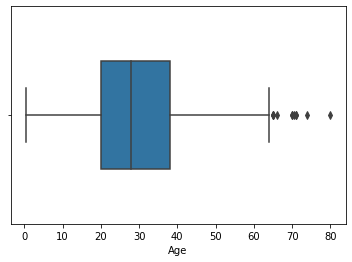

In [11]:
sns.boxplot(df['Age'] ,width= 0.5)
# on percoit que beaucoup de données aberentes ; cela inclus que les données sont pas centré autour 
# de la moyenne donc on vas remplacé les Na par par l"age median

In [12]:
df["Age"].fillna(df["Age"].median(), inplace = True) 
df["Age"].head()

0    28.0
1    25.0
2    20.0
3    29.0
4    31.0
Name: Age, dtype: float64

In [13]:
# nous voyons que Cabin contient des valeurs manquantes. comptons-les encore.
df['Cabin'].isnull().sum()

687

In [14]:
# comprenhension de la colonne Cabine.
df['Cabin'].value_counts().head()

G6             4
B96 B98        4
C23 C25 C27    4
F33            3
D              3
Name: Cabin, dtype: int64

In [15]:
# Remplissage de toutes les variables null (NaN) de Cabin comme  'X'
df['Cabin'].fillna(value = 'X', inplace=True)
df['Cabin'].head()

0        X
1    F G73
2        X
3        X
4      B71
Name: Cabin, dtype: object

In [16]:
# Garder le 1er caractere de la cabine (voir)
df['Cabin'] = df['Cabin'].apply(lambda x: x[0])
df['Cabin'].value_counts()


X    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [17]:
df[['Pclass','Survived']].groupby(['Survived'], as_index = True).mean()

,Pclass
Survived,
No,2.531876
Yes,1.950292


In [18]:
df[['Sex','Fare','Age']].groupby(['Sex'], as_index = True).corr()

Fare       Age
Sex                            
female Fare  1.000000  0.165009
       Age   0.165009  1.000000
male   Fare  1.000000  0.079174
       Age   0.079174  1.000000

In [19]:
#voir la colonne Nom..
df['Name'].head(10)

0                           Collander, Mr. Erik Gustaf
1                              Moen, Mr. Sigurd Hansen
2                               Jensen, Mr. Hans Peder
3          Palsson, Mrs. Nils (Alma Cornelia Berglund)
4                               Davidson, Mr. Thornton
5                       Gustafsson, Mr. Anders Vilhelm
6                                 Patchett, Mr. George
7                          Nakid, Miss. Maria ("Mary")
8                      Lovell, Mr. John Hall ("Henry")
9    Louch, Mrs. Charles Alexander (Alice Adelaide ...
Name: Name, dtype: object

In [20]:
# Extracting title from Name and create a new variable Title.
df['Title'] = df['Name'].str.extract('([A-Za-z]+)\.')
df['Title'].head(15)

0       Mr
1       Mr
2       Mr
3      Mrs
4       Mr
5       Mr
6       Mr
7     Miss
8       Mr
9      Mrs
10      Mr
11    Miss
12     Mrs
13      Mr
14      Mr
Name: Title, dtype: object

In [21]:
# voir les differentes categories de titre de la colonne Nom.
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

In [22]:
# Voyons a quoi ressemble le titre maintenant.
df['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Don           1
Lady          1
Jonkheer      1
Mme           1
Sir           1
Capt          1
Countess      1
Ms            1
Name: Title, dtype: int64

In [23]:
# Replacer  Dr, Rev, Col, Major, Capt with 'Officer'
df['Title'].replace(to_replace = ['Dr', 'Rev', 'Col', 'Major', 'Capt'], value = 'Officer', inplace=True)

# Replacer Dona, Jonkheer, Countess, Sir, Lady avec 'Aristocrate'
df['Title'].replace(to_replace = ['Dona', 'Jonkheer', 'Countess', 'Sir', 'Lady', 'Don'], value = 'Aristocrat', inplace = True)

#  Replacer Mlle and Ms with Miss. And Mme with Mrs.
df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'}, inplace = True)

In [24]:
# Voir Fusion de Sibsp et Parch et creation d'une nouvelle variable appelee 'Family_size'
df['Family_size'] = df.SibSp + df.Parch + 1  # Adding 1 for single person
df['Family_size'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family_size, dtype: int64

In [25]:
   # Create buckets of single, small, medium, and large and then put respective values into them.
df['Family_size'].replace(to_replace = [1], value = 'single', inplace = True)
df['Family_size'].replace(to_replace = [2,3], value = 'small', inplace = True)
df['Family_size'].replace(to_replace = [4,5], value = 'medium', inplace = True)
df['Family_size'].replace(to_replace = [6, 7, 8, 11], value = 'large', inplace = True)

In [26]:
# let's see how 'Family_size' looks now
df['Family_size'].value_counts()

single    537
small     263
large      47
medium     44
Name: Family_size, dtype: int64

In [27]:
# Assign N s'il n'y a que le nombre et pas de caractere. S'il y a un caractere, n'en extraire que le caractere.
Ticket = []
for x in list(df['Ticket']):
    if x.isdigit():
         Ticket.append('N')
    else:
          Ticket.append(str(x).replace('.','').replace('/','').strip().split(' ')[0])
# Swap values
df['Ticket'] = Ticket

In [28]:
# Voir et faire le point sur les categories ticket
df['Ticket'].value_counts()

N          661
PC          60
CA          41
A5          21
SOTONOQ     15
STONO       12
WC          10
A4           7
SCPARIS      7
SOC          6
STONO2       6
C            5
FCC          5
LINE         4
SCParis      4
WEP          3
PP           3
SCAH         3
SOPP         3
SOTONO2      2
SWPP         2
PPP          2
SC           1
FC           1
SP           1
CASOTON      1
SCOW         1
Fa           1
AS           1
SOP          1
SCA4         1
Name: Ticket, dtype: int64

In [29]:
# Voir et Garder seulement le 1er caractere pour reduire les categories de variable ticket
df['Ticket'] = df['Ticket'].apply(lambda x : x[0])
df['Ticket'].value_counts()

N    661
S     65
P     65
C     47
A     29
W     13
F      7
L      4
Name: Ticket, dtype: int64

In [30]:
# Creez une fonction pour compter le nombre total de valeurs aberrantes..
def outliers(variable):
    global filtered # Le mot cle global est utilise dans une fonction uniquement lorsque nous voulons 
                    # effectuer des affectations ou modifier une variable.
     # Calculer 1ere, 3e  quartiles et iqr ou EI.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
      # Calculer la cloture inferieure et la cloture superieure pour les valeurs aberrantes
    l_fence, u_fence = q1 - 1.5*iqr , q3 + 1.5*iqr   # Toutes les valeurs inferieures a l_fence et superieures a u_fence 
                                                     #sont des valeurs aberrantes.

        # Des observations qui sont aberrantes
    outliers = variable[(variable<l_fence) | (variable>u_fence)]
    print('Total Outliers of', variable.name,':', outliers.count())
    
    # Laisser tomber les observations qui sont aberrantes

    filtered = variable.drop(outliers.index, axis = 0)

In [31]:
#Nombre Total de valeurs aberrantes dans le tarif
outliers(df['Fare'])

Total Outliers of Fare : 116


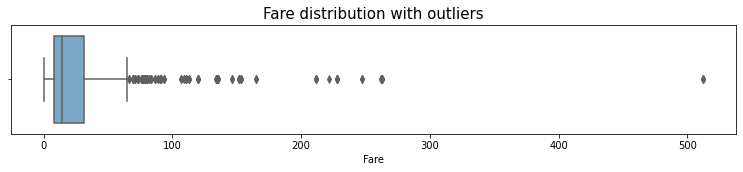

In [32]:
# Visualisation de la repartition des tarifs avec les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=df['Fare'],palette='Blues')
plt.title('Fare distribution with outliers', fontsize=15 )
plt.show()

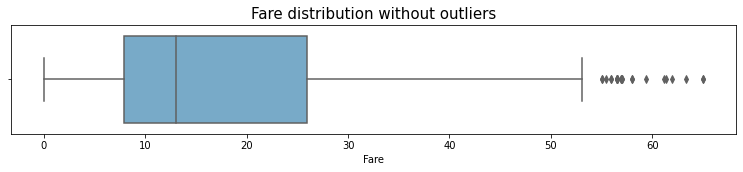

In [33]:
# Visualisation de la repartition des tarifs sans les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('Fare distribution without outliers', fontsize=15 )
plt.show()

In [34]:
# Total des nombres eloignes pour l'Age
outliers(df['Age'])

Total Outliers of Age : 66


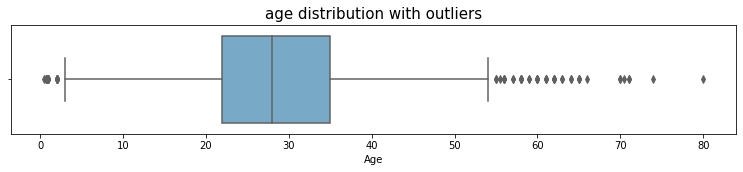

In [35]:
# Visualisation de la repartition de l'Age avec les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=df['Age'],palette='Blues')
plt.title('age distribution with outliers', fontsize=15)
plt.show()


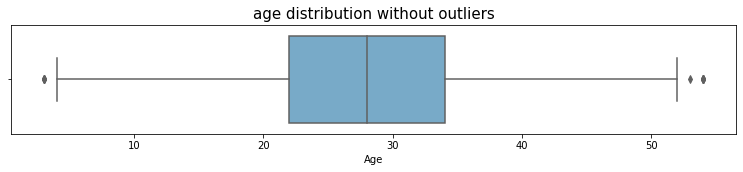

In [36]:
# Visualisation de la repartition de l'Age sans les valeurs aberrantes
plt.figure(figsize=(13, 2))
sns.boxplot(x=filtered,palette='Blues')
plt.title('age distribution without outliers', fontsize=15)
plt.show()

In [37]:
# comptons les valeurs manquantes pour chaque variable
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
Title          0
Family_size    0
dtype: int64

In [38]:
# voir  le mode de la variable Embarque parce que le mode embarque est une variable categorique.
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [39]:
#  Ici, S (port Southampton)  est la plus frequente
df['Embarked'].fillna(value = 'S', inplace = True)

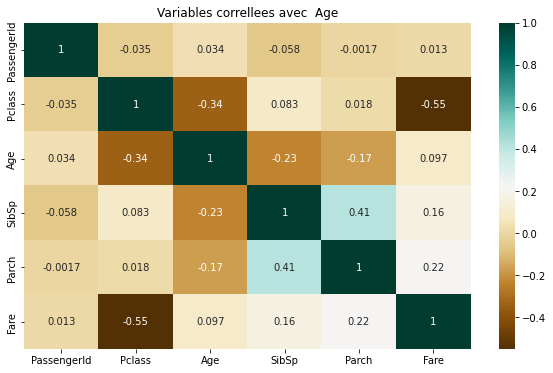

In [40]:
# (voir) Maintenant, creez la correlation "carte chaleur" de df
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap ='BrBG',annot = True)
plt.title('Variables correllees avec  Age')
plt.show()